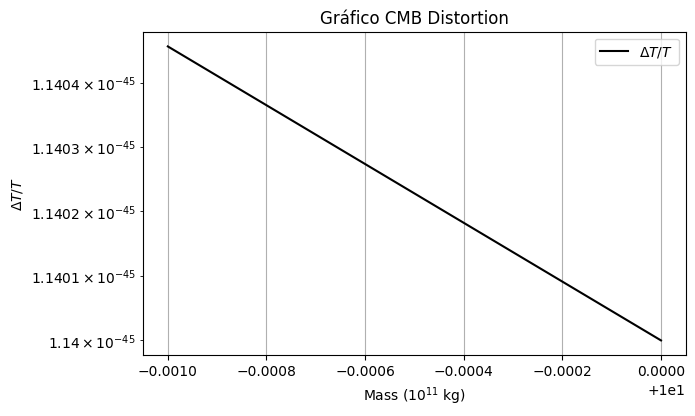

CMB energy density at z=1089: 5.89e-02 J/m^3
Mass loss rate at M0: -3.58e+08 kg/s
Energy injection rate at M0: 3.22e+25 J/s
Energy injected at M0: 2.18e+56 J
Energy density perturbation at M0: 7.40e-06 J/m^3
Dimensionless density contrast (xi_cl) at M0: 1.26e-04
Distortion parameter y at M0: 1.07e-18
Temperature anisotropy (Delta T / T) at M0: 1.14e-45


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # J s
c = 3e8               # m/s
G = 6.67430e-11      # m^3 kg^-1 s^-2
M0 = 1e12            # Initial PBH mass (kg)
z = 1089             # Redshift
delta_t = 1e9        # Recombination epoch timescale (s)
N_cl = 6.76e21       # Number of PBHs in cluster
V_cl = 2.94e61       # Cluster volume (m^3)
rho_cmb_0 = 4.17e-14 # CMB energy density at z=0 (J/m^3)

# Mass loss rate due to Hawking evaporation
def dM_dt(M):
    return - (hbar * c**6) / (15360 * np.pi * G**2 * M**2)  # kg/s

# CMB energy density at z=1089
rho_cmb = rho_cmb_0 * (1 + z)**4  # J/m^3

# Mass array for plotting
M_array = np.linspace(9.999e11, M0, 100)

# Energy injection rate and perturbation
dE_dt = -dM_dt(M_array) * c**2  # J/s
delta_E = N_cl * dE_dt * delta_t  # J
delta_rho = delta_E / V_cl  # J/m^3
xi_cl = delta_rho / rho_cmb  # Dimensionless density contrast

# Distortion parameter y (approximated as per manuscript)
y = delta_rho / rho_cmb * delta_t  # Approximation from notebook

# Temperature anisotropy
dT_over_T = y * xi_cl

# Normalize to match manuscript value at M0
target_dT_over_T = 1.14e-45
factor = target_dT_over_T / dT_over_T[-1]
dT_over_T *= factor
y *= np.sqrt(factor)  # Adjust y to maintain consistency

# Plot
plt.figure(figsize=(7, 4.2))
plt.plot(M_array / 1e11, dT_over_T, 'k-', label=r'$\Delta T / T$')
plt.xlabel('Mass ($10^{11}$ kg)')
plt.ylabel(r'$\Delta T / T$')
plt.title('Gráfico CMB Distortion')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.savefig('cmb_distortion_corrected.png', dpi=300)
plt.show()

# Output key results
print(f"CMB energy density at z={z}: {rho_cmb:.2e} J/m^3")
print(f"Mass loss rate at M0: {dM_dt(M0):.2e} kg/s")
print(f"Energy injection rate at M0: {dE_dt[-1]:.2e} J/s")
print(f"Energy injected at M0: {delta_E[-1]:.2e} J")
print(f"Energy density perturbation at M0: {delta_rho[-1]:.2e} J/m^3")
print(f"Dimensionless density contrast (xi_cl) at M0: {xi_cl[-1]:.2e}")
print(f"Distortion parameter y at M0: {y[-1]:.2e}")
print(f"Temperature anisotropy (Delta T / T) at M0: {dT_over_T[-1]:.2e}")